# Different classification models

In [24]:
#!pip install opendatasets

In [25]:
# !pip install requests
# !pip install tabulate
# !pip install future
# !pip install matplotlib

In [26]:
# !pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

In [27]:
# !pip install h2o

In [28]:
import opendatasets as od
import pandas
  
od.download(
    "https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction")

Skipping, found downloaded files in "./heart-failure-prediction" (use force=True to force download)


In [29]:
!ls

Group_project_HXD220000_MXB220061_KXV220007_MXS220057.Rmd
Group_project_HXD220000_MXB220061_KXV220007_MXS220057.html
HeartDiseaseGroupProject.ipynb
Project Outline.pdf
Research question.docx
ggpairs_data.png
ggpairs_hd_data.png
heart-failure-prediction
heart.csv


In [30]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,30 mins 19 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.3
H2O_cluster_version_age:,15 days
H2O_cluster_name:,H2O_from_python_harikrishnadev_8xsbso
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.319 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [32]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


<Axes: >

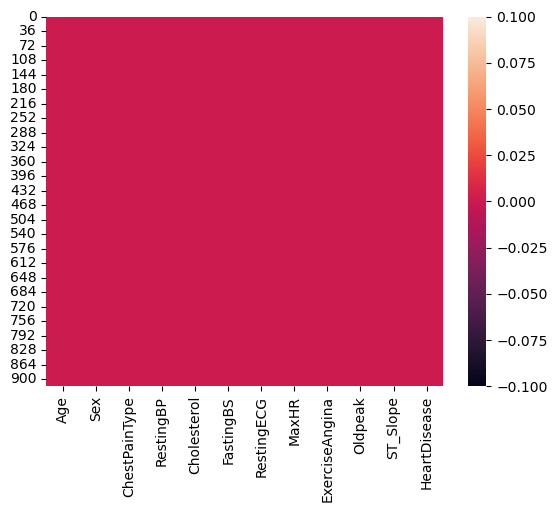

In [34]:
sns.heatmap(df.isnull())

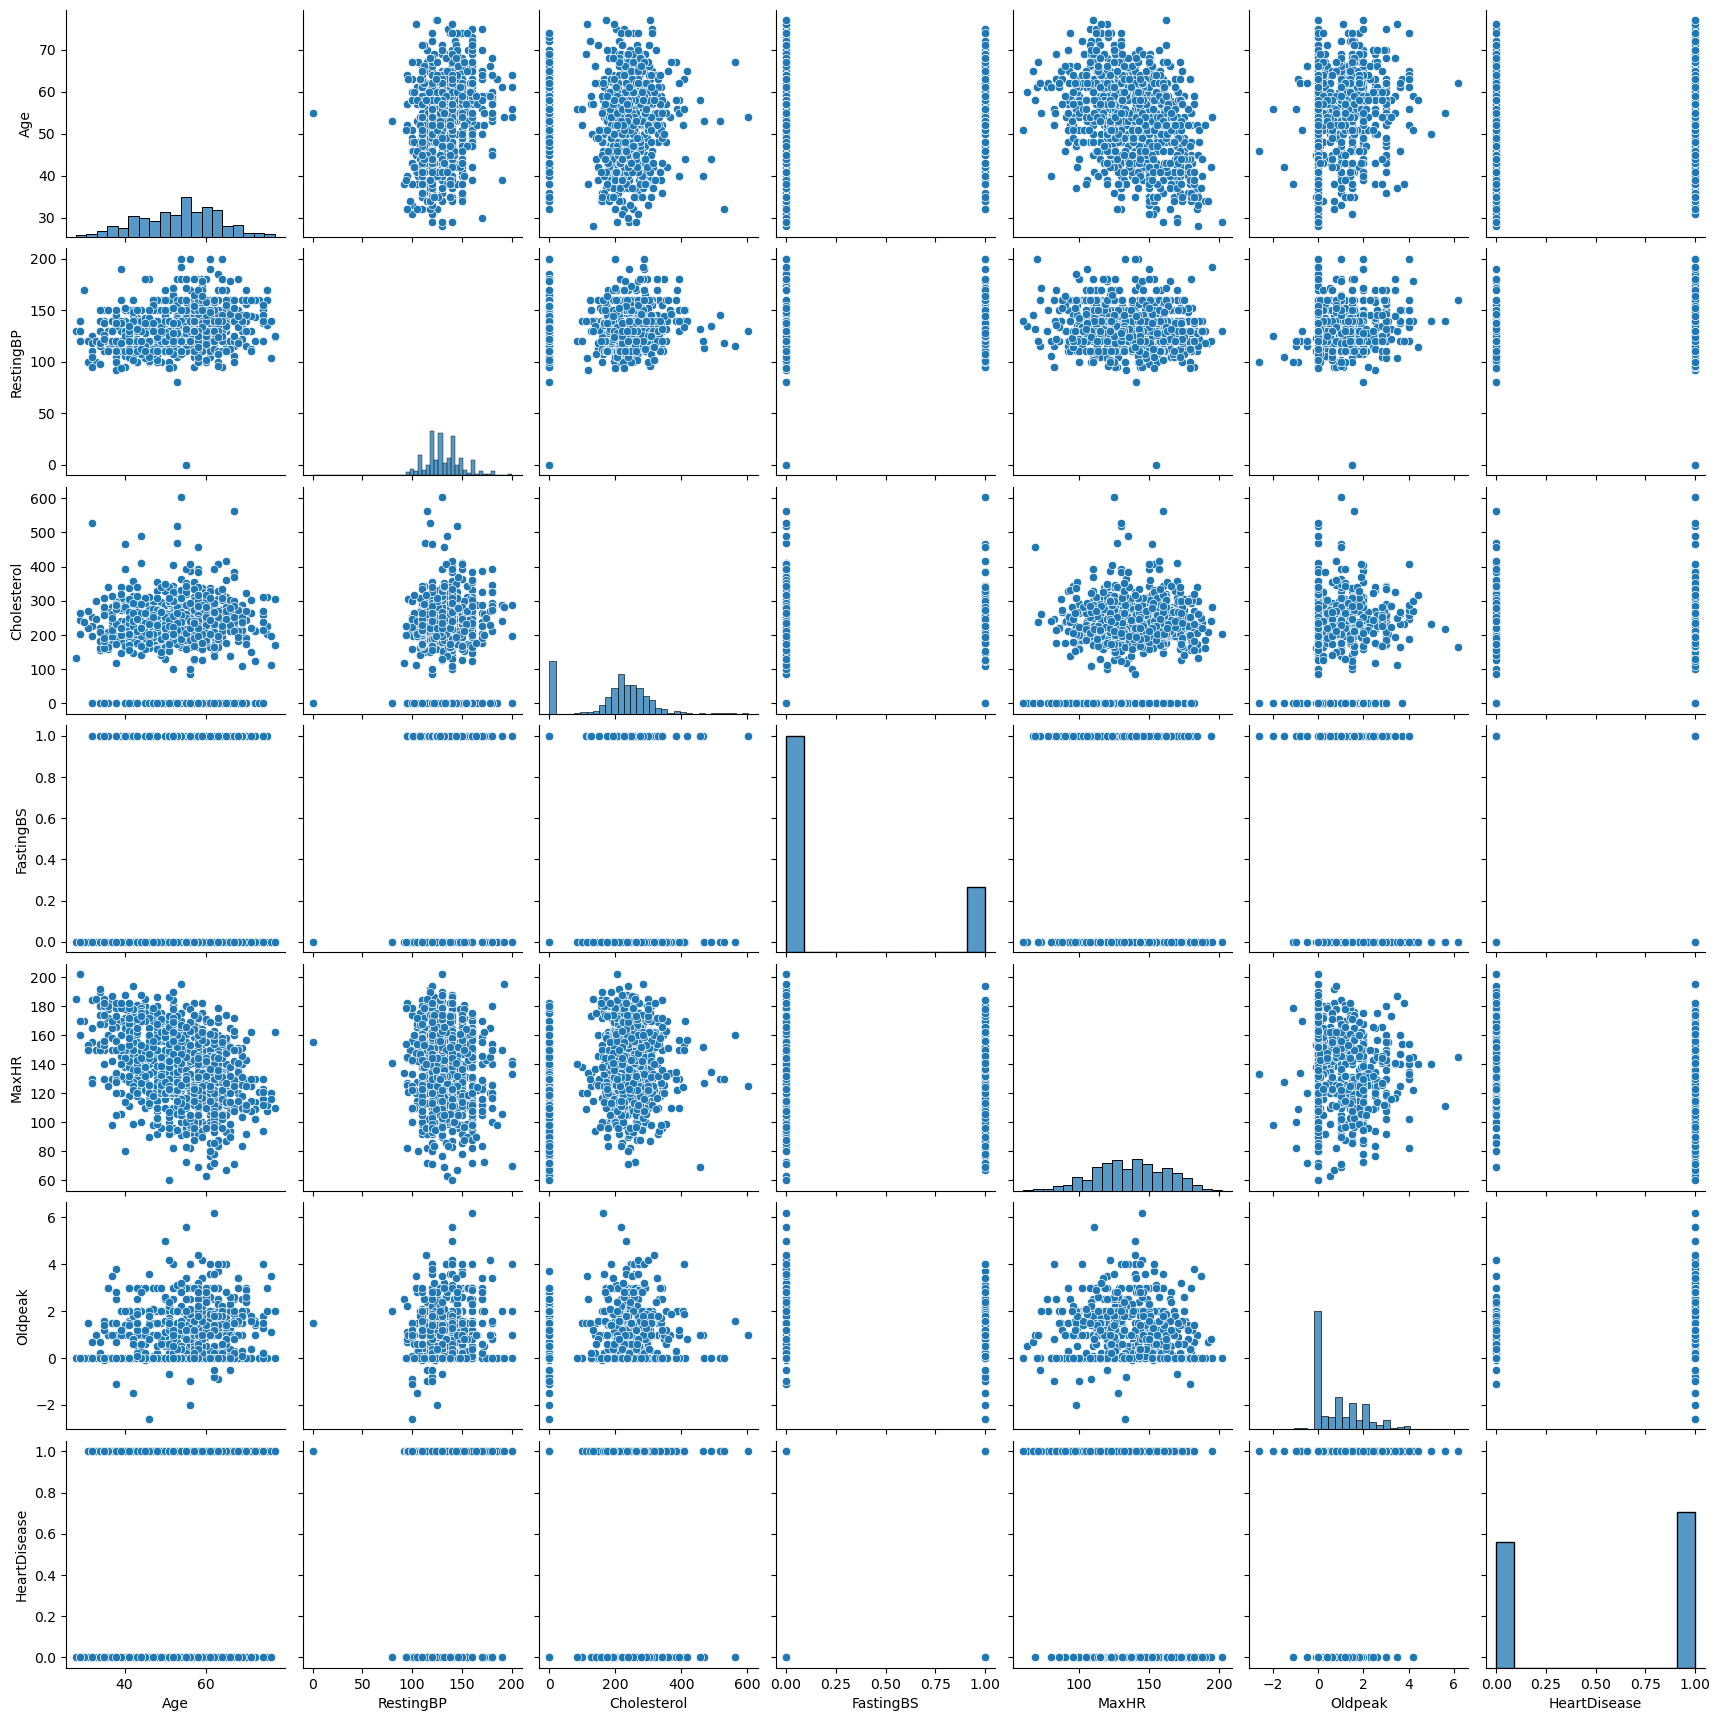

In [35]:
sns.pairplot(df)

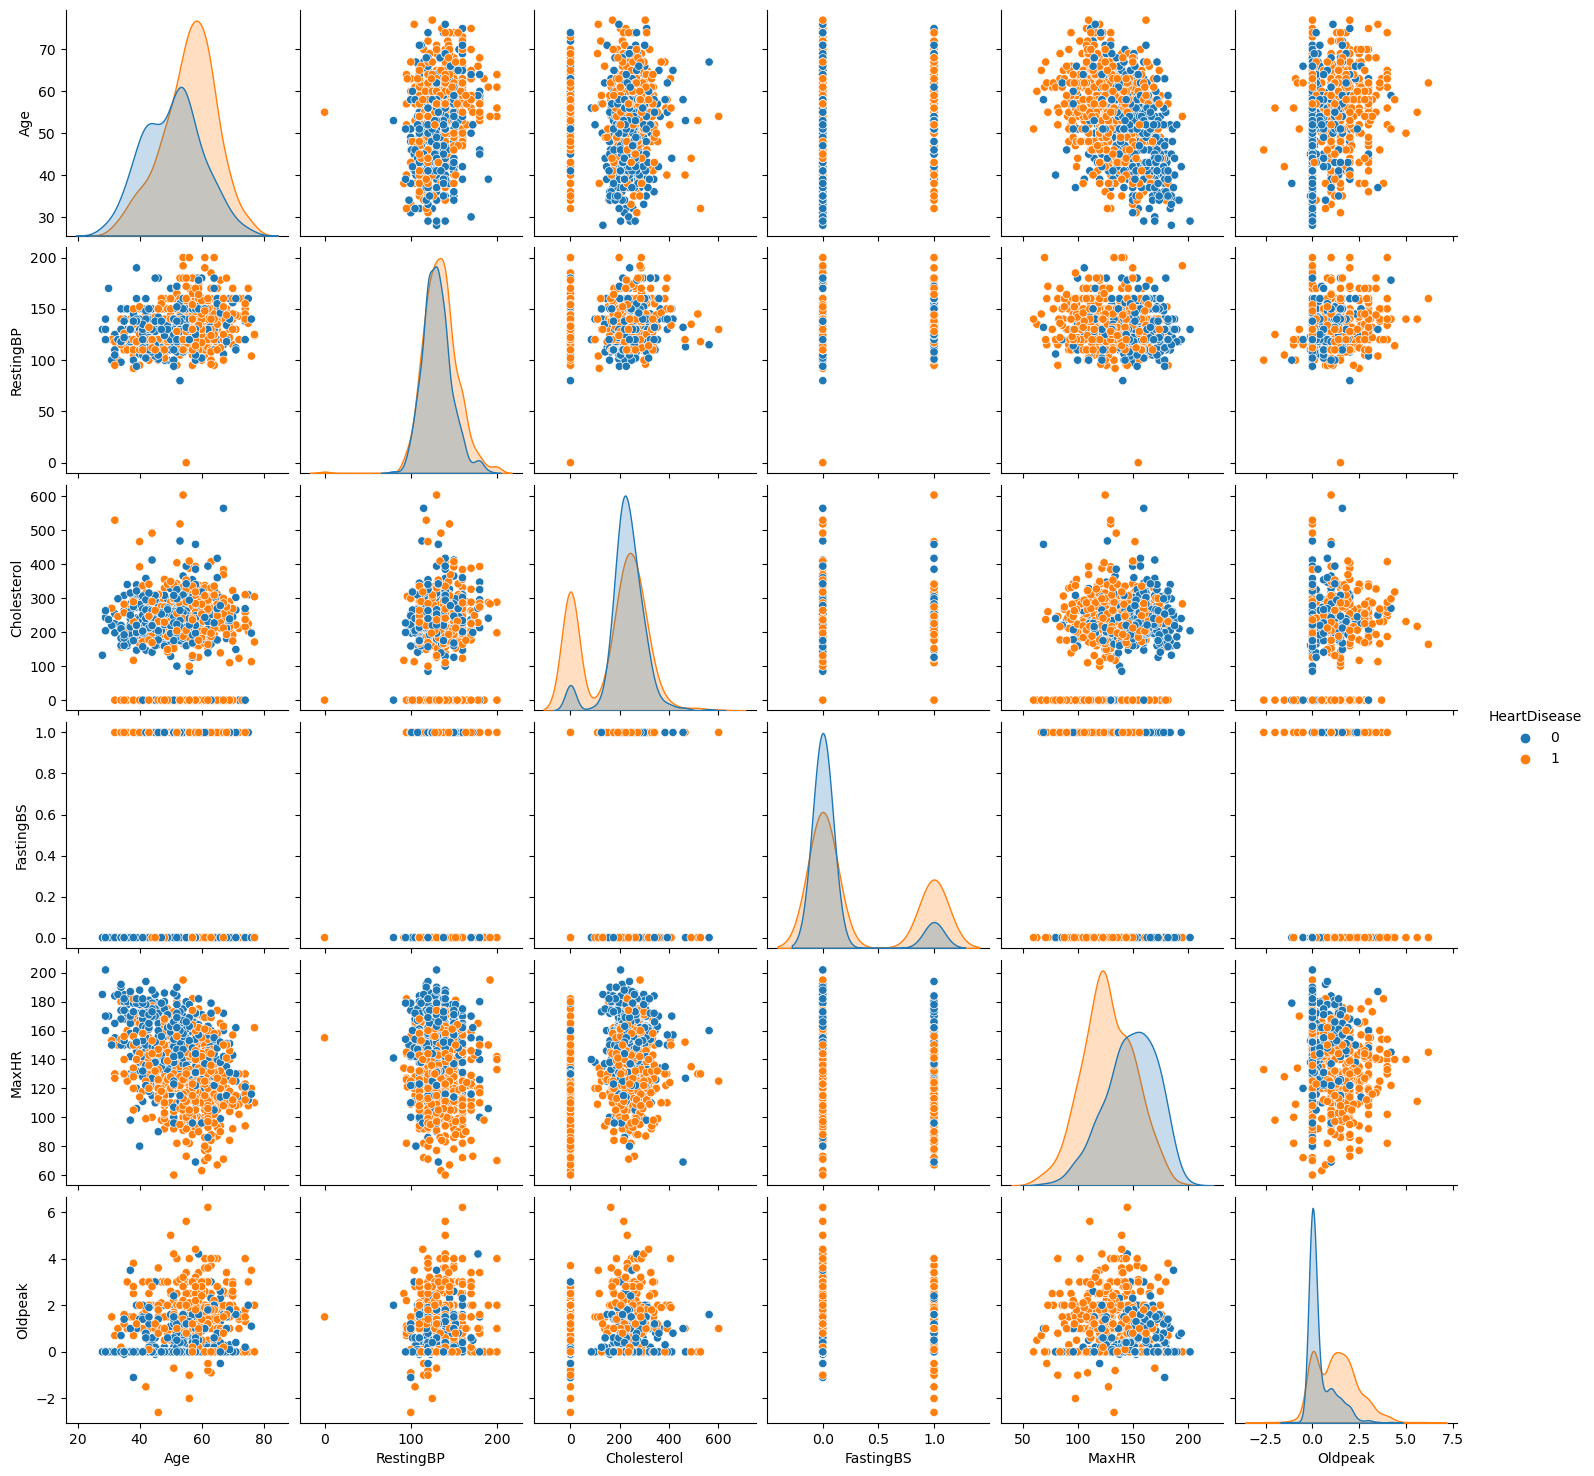

In [36]:
sns.pairplot(df,hue="HeartDisease")

/var/folders/3d/fk1zpy415g31bg07yrkc5qbm0000gn/T/ipykernel_83002/4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

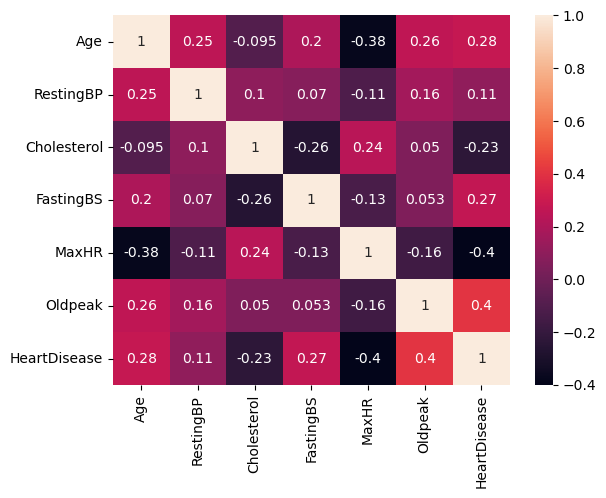

In [37]:
sns.heatmap(df.corr(),annot=True)

In [38]:
categorical_features = ["Sex","ChestPainType", "FastingBS", "RestingECG" ,"ExerciseAngina", "ST_Slope", "HeartDisease"]
numerical_features = ["Age" ,"RestingBP" ,"Cholesterol", "MaxHR" ,"Oldpeak"]

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = df.copy(deep = True)
df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

/Users/harikrishnadev/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/harikrishnadev/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/harikrishnadev/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a fu

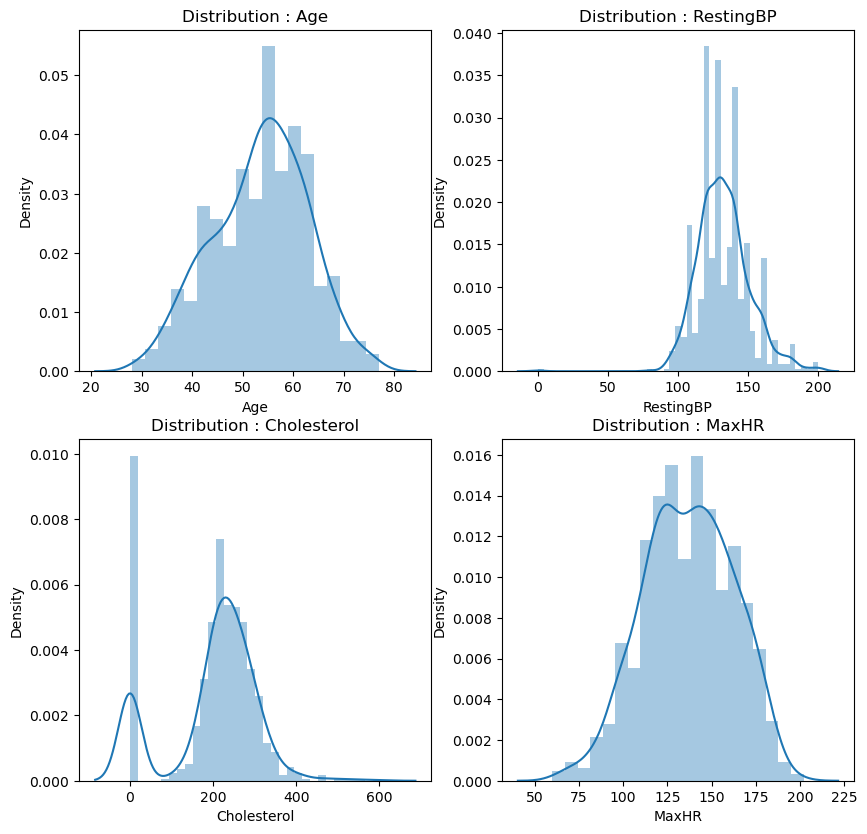

/Users/harikrishnadev/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


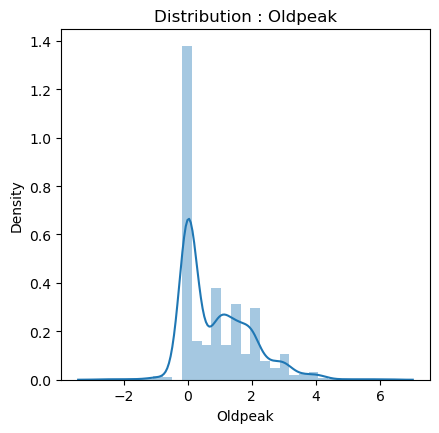

In [40]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (10,9.75))
for i in range(len(numerical_features) - 1):
    plt.subplot(2,2,i+1)
    sns.distplot(df[numerical_features[i]])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[numerical_features[len(numerical_features) - 1]])
title = 'Distribution : ' + numerical_features[len(numerical_features) - 1]
plt.title(title);

In [41]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['Oldpeak'] = mms.fit_transform(df1[['Oldpeak']])
df1['Age'] = ss.fit_transform(df1[['Age']])
df1['RestingBP'] = ss.fit_transform(df1[['RestingBP']])
df1['Cholesterol'] = ss.fit_transform(df1[['Cholesterol']])
df1['MaxHR'] = ss.fit_transform(df1[['MaxHR']])
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1,1,0.410909,0.825070,0,1,1.382928,0,0.295455,2,0
1,-0.478484,0,2,1.491752,-0.171961,0,1,0.754157,0,0.409091,1,1
2,-1.751359,1,1,-0.129513,0.770188,0,2,-1.525138,0,0.295455,2,0
3,-0.584556,0,0,0.302825,0.139040,0,1,-1.132156,1,0.465909,1,1
4,0.051881,1,2,0.951331,-0.034755,0,1,-0.581981,0,0.295455,2,0


/var/folders/3d/fk1zpy415g31bg07yrkc5qbm0000gn/T/ipykernel_83002/58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

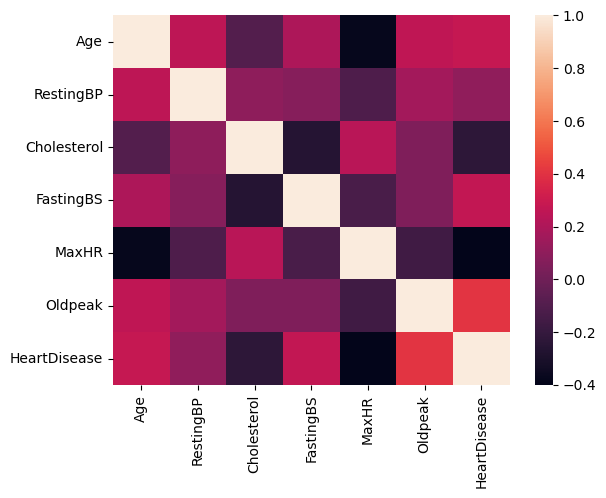

In [42]:
sns.heatmap(df.corr())

In [43]:
from h2o.automl import H2OAutoML

In [44]:
df = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [45]:
train, test = df.split_frame(ratios=[0.8], seed = 1)

In [48]:
x = df.columns
y = "HeartDisease"
x = x.remove(y)

In [49]:
x

In [50]:
y

'HeartDisease'

In [51]:
aml = H2OAutoML(max_models=30,balance_classes=True, seed=986875)
aml.train(y=y, training_frame=train)


AutoML progress: |
21:49:15.226: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


21:49:15.963: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


21:49:16.354: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
21:49:17.393: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
21:49:18.125: _response param, We have detect

key,value
Stacking strategy,cross_validation
Number of base models (used / total),17/49
# GBM base models (used / total),16/35
# XGBoost base models (used / total),1/11
# DRF base models (used / total),0/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [52]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_3_20230419_214915,0.311305,0.0969109,0.20903,0.217914,0.0969109
StackedEnsemble_BestOfFamily_1_AutoML_3_20230419_214915,0.313505,0.0982855,0.21055,0.219832,0.0982855
GBM_grid_1_AutoML_3_20230419_214915_model_24,0.31365,0.098376,0.210696,0.220228,0.098376
GBM_grid_1_AutoML_3_20230419_214915_model_25,0.314377,0.0988326,0.205529,0.219649,0.0988326
GBM_grid_1_AutoML_3_20230419_214915_model_15,0.314528,0.0989282,0.212458,0.22076,0.0989282
GBM_grid_1_AutoML_3_20230419_214915_model_23,0.314561,0.0989489,0.221538,0.220637,0.0989489
GBM_grid_1_AutoML_3_20230419_214915_model_28,0.31458,0.0989608,0.222445,0.220474,0.0989608
GBM_grid_1_AutoML_3_20230419_214915_model_5,0.314605,0.0989761,0.227273,0.220637,0.0989761
GBM_4_AutoML_3_20230419_214915,0.315699,0.0996658,0.212474,0.221613,0.0996658
GBM_grid_1_AutoML_3_20230419_214915_model_32,0.316536,0.100195,0.213249,0.221776,0.100195


In [53]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_3_20230419_214915


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  17/49
# GBM base models (used / total)      16/35
# XGBoost base models (used / total)  1/11
# DRF base models (used / total)      0/2
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.04727872657969068
RMSE: 0.21743671856356434
MAE: 0.14579183354741038
RMSLE: 0.1560549845218081
Mean Residual Deviance: 0.04727872657969068
R^2: 0.8094620853259518
Null degrees of freedom: 728

In [56]:
aml.leader

key,value
Stacking strategy,cross_validation
Number of base models (used / total),17/49
# GBM base models (used / total),16/35
# XGBoost base models (used / total),1/11
# DRF base models (used / total),0/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [54]:
best_model.model_performance(test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.11088333075473991
RMSE: 0.3329914875109271
MAE: 0.22487926610620262
RMSLE: 0.23100904862862012
Mean Residual Deviance: 0.11088333075473991
R^2: 0.5407162038624693
Null degrees of freedom: 188
Residual degrees of freedom: 171
Null deviance: 46.09053497942397
Residual deviance: 20.956949512645842
AIC: 158.69546835978446

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
GBM_grid_1_AutoML_3_20230419_214915_model_5,0.327182,0.107048,0.237449,0.230159,0.107048,63,0.010407,GBM
GBM_grid_1_AutoML_3_20230419_214915_model_2,0.328667,0.108022,0.237604,0.231187,0.108022,90,0.010858,GBM
GBM_grid_1_AutoML_3_20230419_214915_model_14,0.328709,0.10805,0.24083,0.231161,0.10805,65,0.010316,GBM
GBM_grid_1_AutoML_3_20230419_214915_model_18,0.329087,0.108298,0.231344,0.228614,0.108298,75,0.010826,GBM
GBM_grid_1_AutoML_3_20230419_214915_model_28,0.329181,0.10836,0.231788,0.229515,0.10836,94,0.011519,GBM
GBM_grid_1_AutoML_3_20230419_214915_model_1,0.329342,0.108466,0.235359,0.229712,0.108466,71,0.01516,GBM
GBM_1_AutoML_3_20230419_214915,0.329383,0.108493,0.236453,0.23077,0.108493,103,0.009725,GBM
GBM_grid_1_AutoML_3_20230419_214915_model_22,0.329783,0.108757,0.237189,0.230313,0.108757,65,0.008975,GBM
GBM_grid_1_AutoML_3_20230419_214915_model_26,0.330298,0.109097,0.23807,0.23216,0.109097,53,0.011808,GBM
StackedEnsemble_BestOfFamily_1_AutoML_3_20230419_214915,0.330394,0.10916,0.223147,0.22961,0.10916,357,0.048016,StackedEnsemble


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

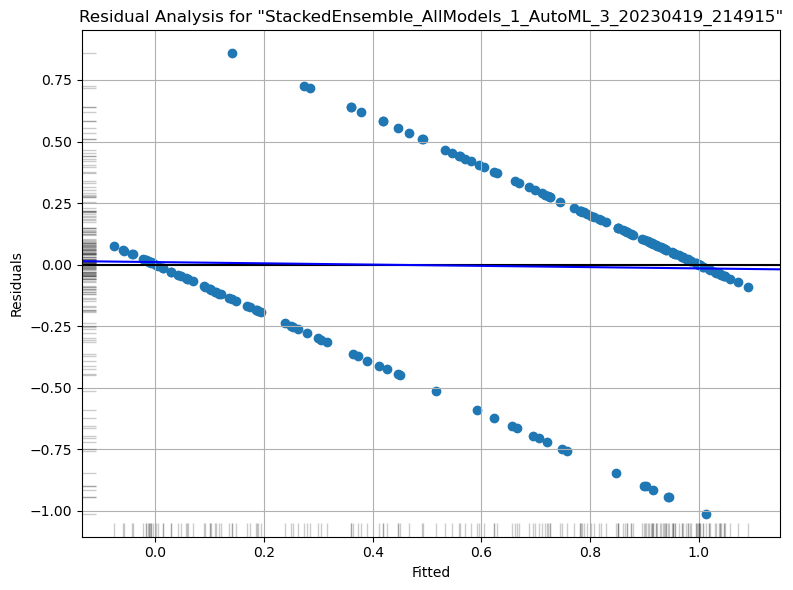

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

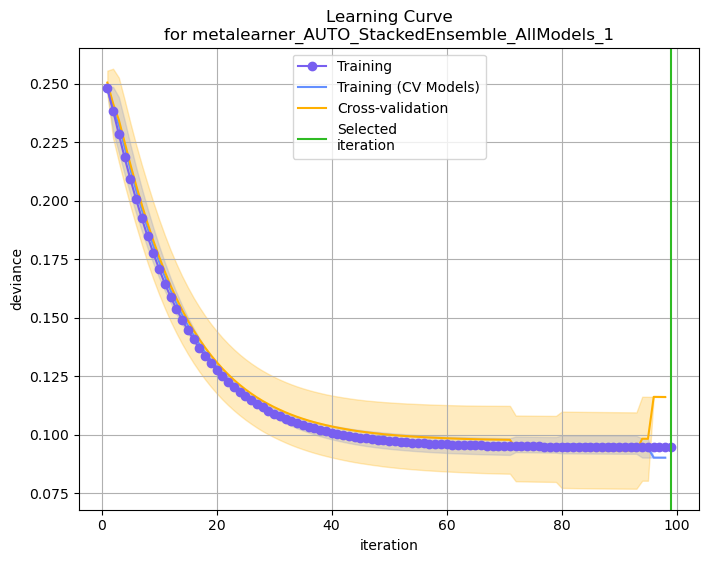

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

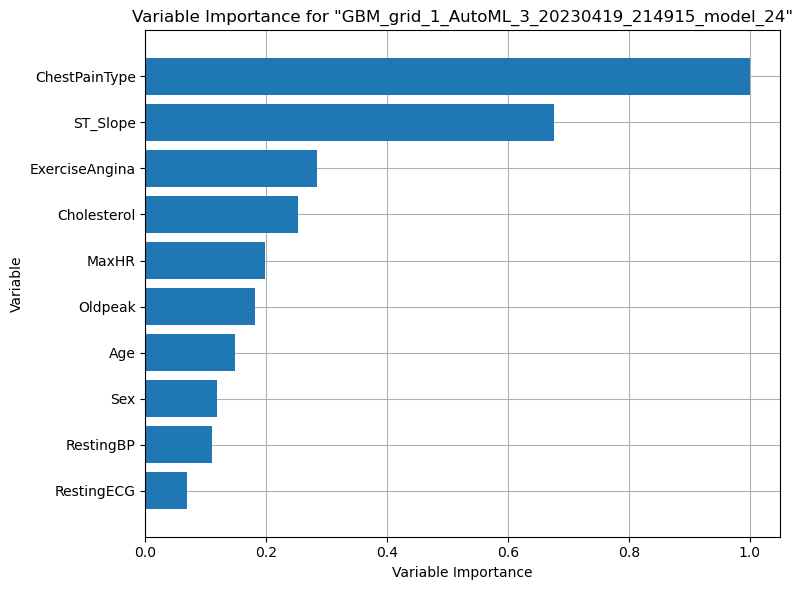

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

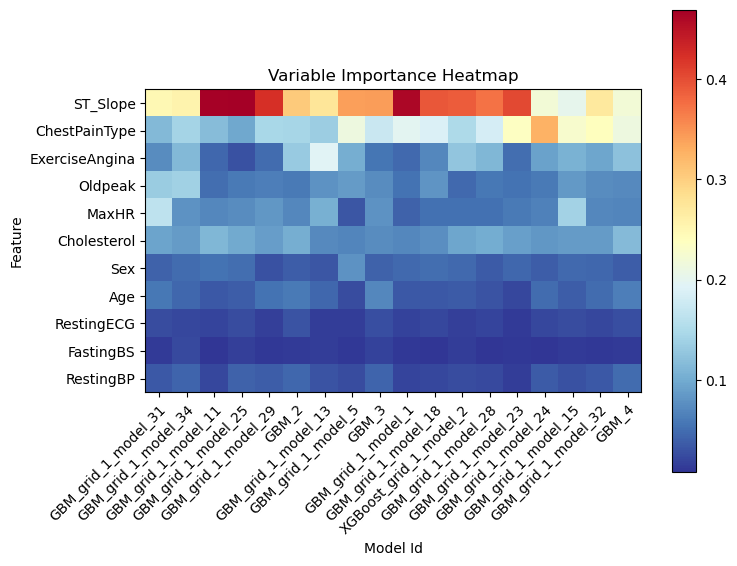

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

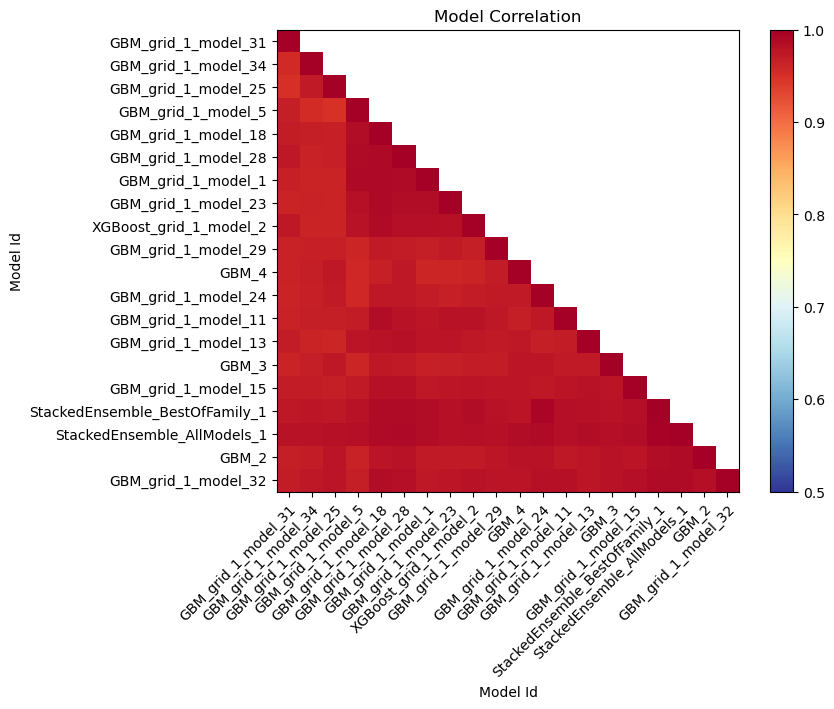

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

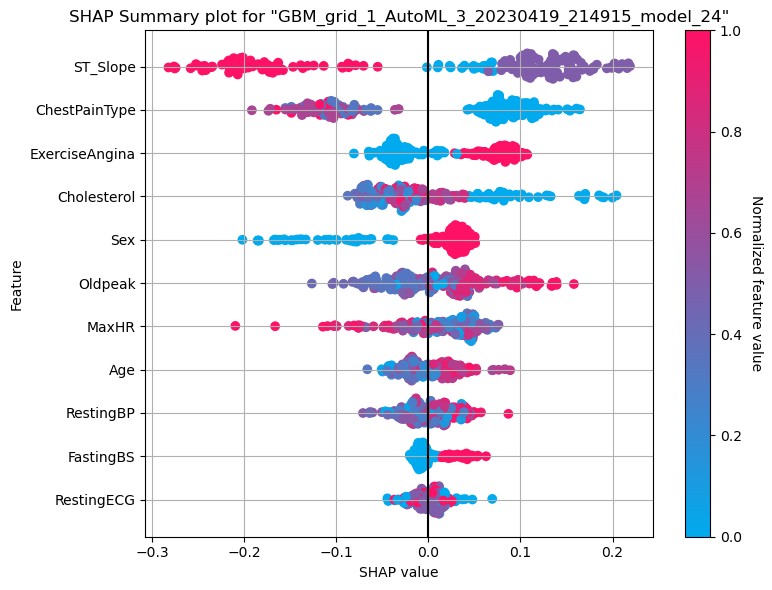

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

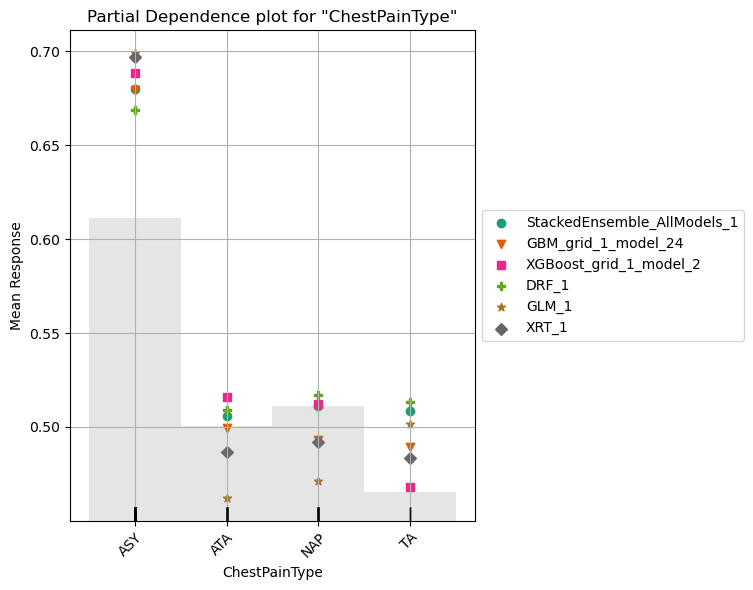

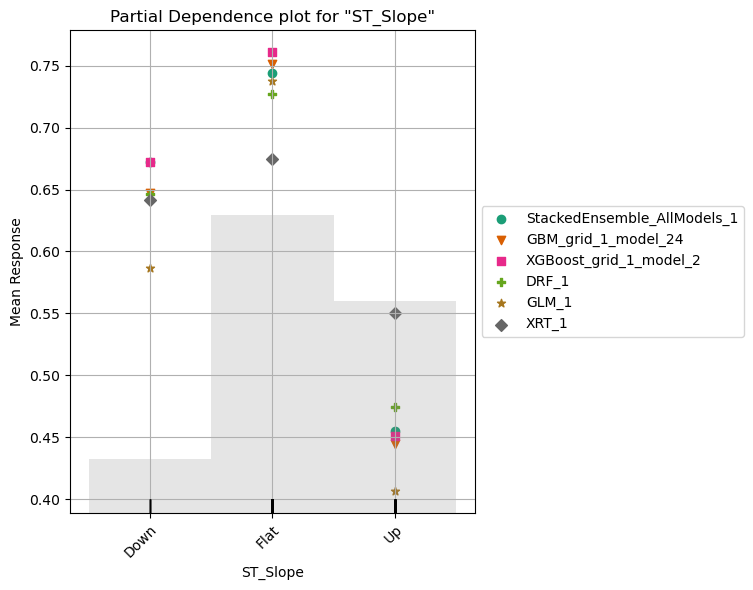

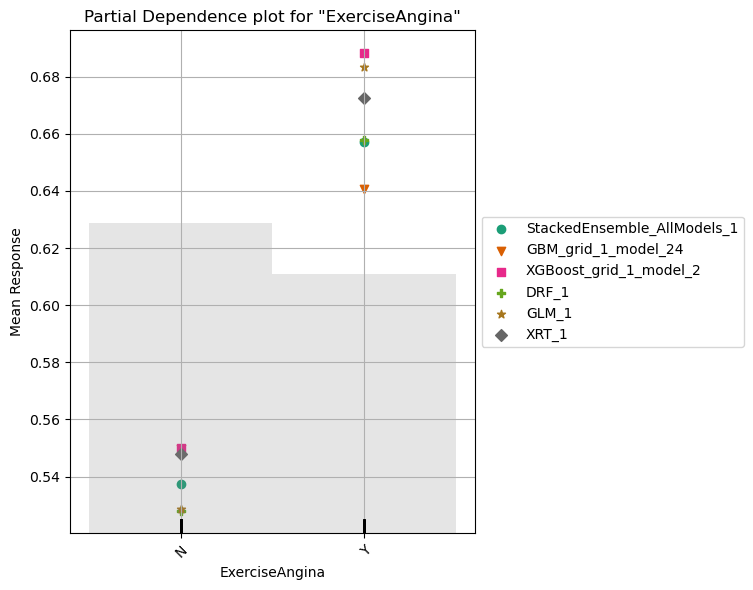

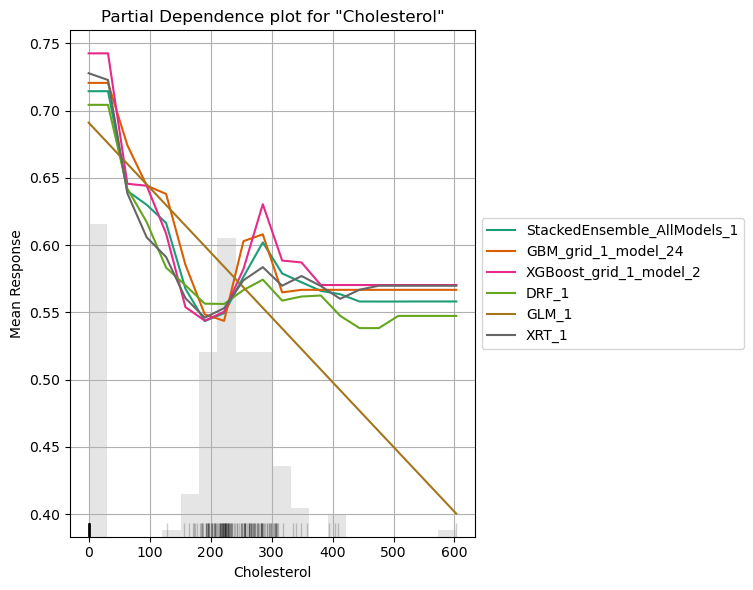

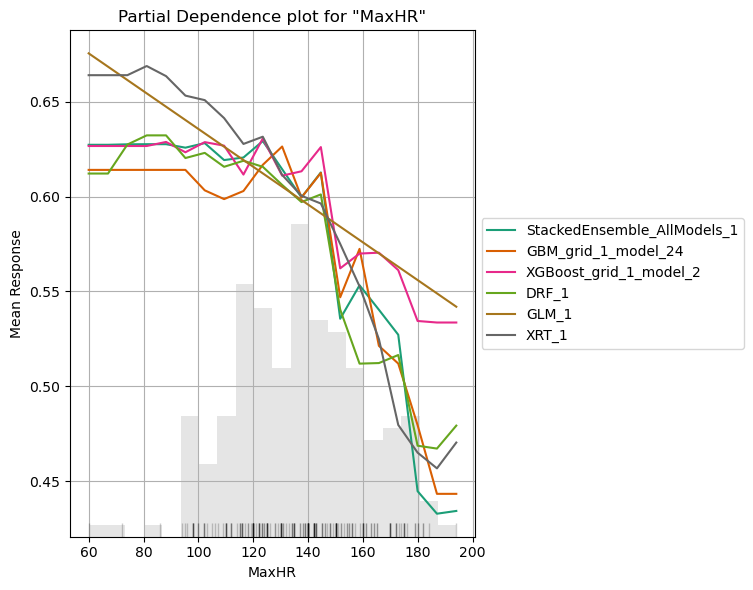

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

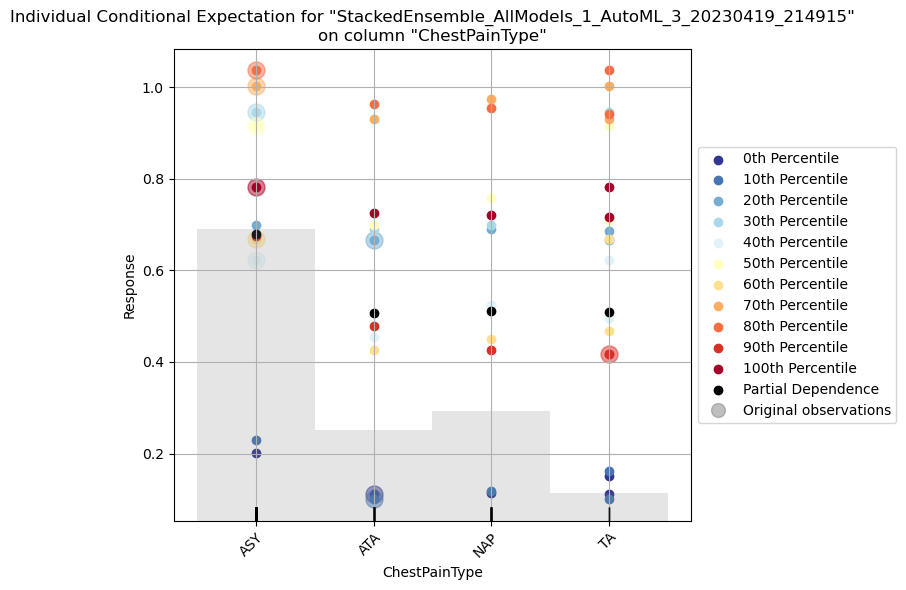

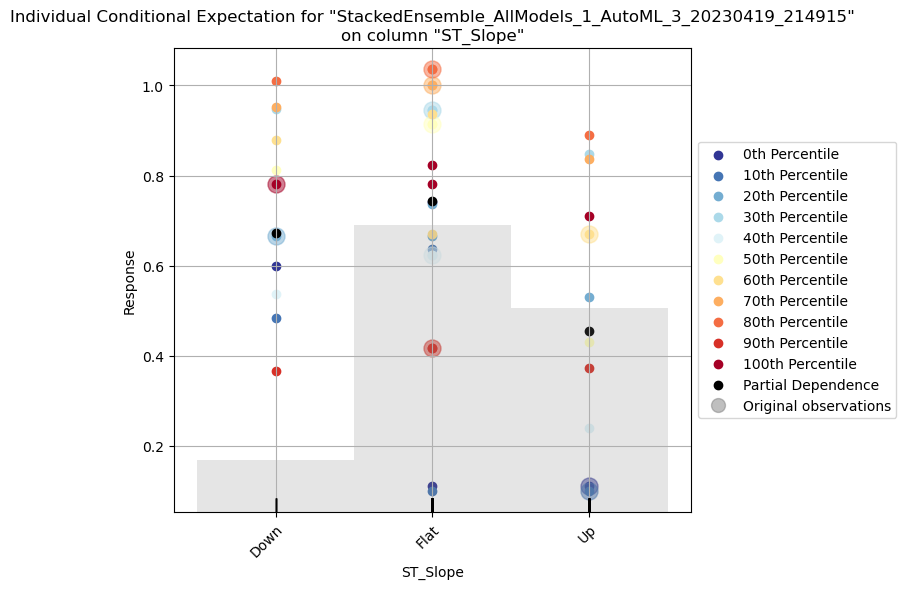

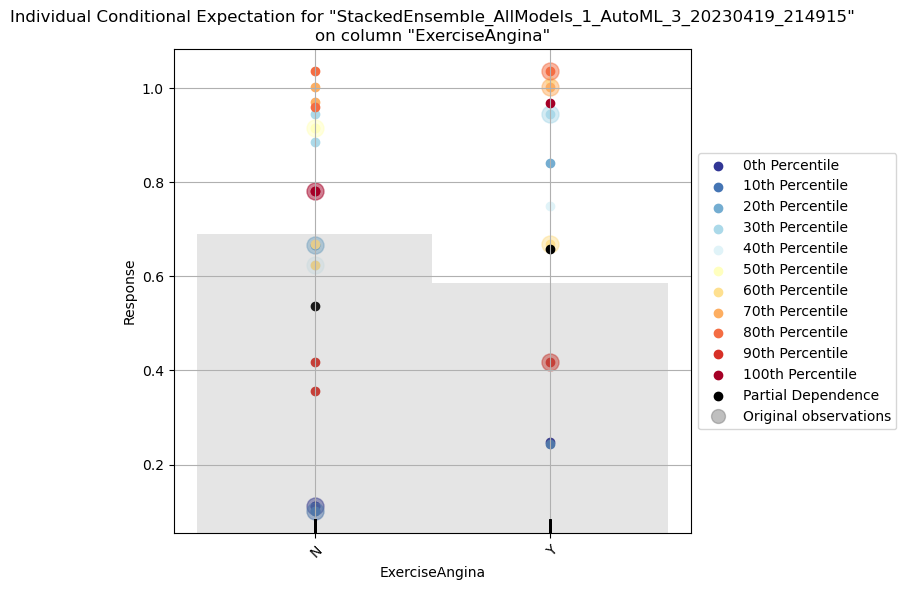

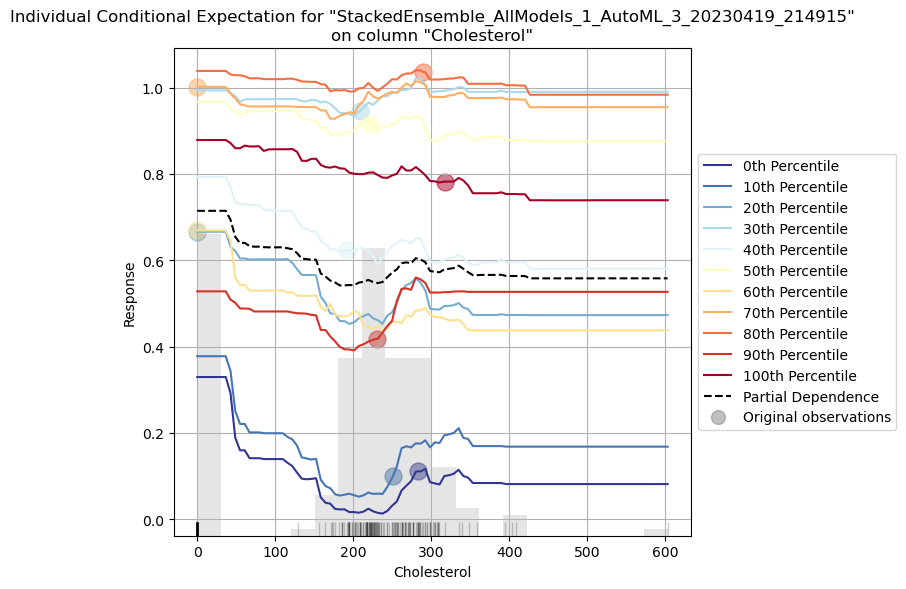

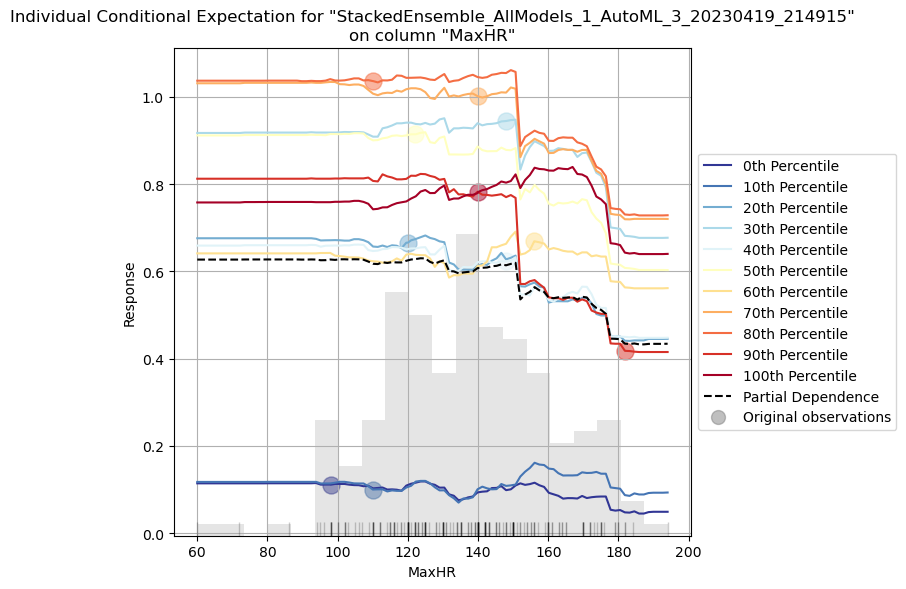

In [55]:
explain_model = aml.explain(frame = test, figsize = (8,6))